In [260]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from pyjarowinkler import distance
from math import*
from gensim import corpora, models
from sklearn.metrics import euclidean_distances
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
def getStats(y_pred, label_true, featureVec, sentences):
    countx = label_true.count(1)
    county = label_true.count(0)
    total = len(y_pred)
    correct = 0
    count2 = 0
    count3 = 0
    predict1 = 0
    predict0 = 0
    x = 0
    y = 0
    for i in range(len(y_pred)):
        if y_pred[i] == label_true[i]:
            correct += 1
            
        if y_pred[i] == 1:
            predict1 += 1
        else:
            predict0 += 1
        if y_pred[i] == 1 and label_true[i] == 1:
            x += 1
        if y_pred[i] == 0 and label_true[i] == 0:
            y += 1
        if y_pred[i] == 1 and label_true[i] == 0:
            count2 += 1
        if y_pred[i] == 0 and label_true[i] == 1:
            count3 += 1
            
    if predict1 > predict0:
        print("precision: " + str((total-correct) / total))
        print("predict 1 true 1: " + str(y/countx))
        print("predict 0 true 0: " + str(x/county))
    else:
        print("precision: " + str(correct/ total))
        print("predict 1 true 1: " + str(x/countx))
        print("predict 0 true 0: " + str(y/county))
    print("predict 1: " + str(predict1) + " predict0: " + str(predict0))

In [267]:
def outputFile(y_pred, label_true, featureVec, sentences):
    countx = label_true.count(1)
    county = label_true.count(0)
    total = len(y_pred)
    correct = 0
    count2 = 0
    count3 = 0
    predict1 = 0
    predict0 = 0
    file2 = open("wrong_1_actual_0", 'w')
    file3 = open("wrong_0_actual_hate", 'w')
    x = 0
    y = 0
    for i in range(len(y_pred)):
        if y_pred[i] == label_true[i]:
            correct += 1
            
        if y_pred[i] == 1:
            predict1 += 1
        else:
            predict0 += 1
        if y_pred[i] == 1 and label_true[i] == 1:
            x += 1
        if y_pred[i] == 0 and label_true[i] == 0:
            y += 1
        if y_pred[i] == 1 and label_true[i] == 0:
            file2.write(str(featureVec[i][0]) + " " + str(featureVec[i][1]) + " " + str(featureVec[i][2]) + " " + str(featureVec[i][3]) + " " + str(featureVec[i][4]) + " " + str(featureVec[i][5]) + ' ' + str(featureVec[i][6]) + "\n")
            file2.write(" ".join(sentences[i]) + "\n\n")
            count2 += 1
        if y_pred[i] == 0 and label_true[i] == 1:
            file3.write(str(featureVec[i][0]) + " " + str(featureVec[i][1]) + " " + str(featureVec[i][2]) + " " + str(featureVec[i][3]) + " " + str(featureVec[i][4]) + " " + str(featureVec[i][5]) + ' ' + str(featureVec[i][6]) + "\n")
            file3.write(" ".join(sentences[i]) + "\n\n")
            count3 += 1
            
    if predict1 > predict0:
        print("precision: " + str((total-correct) / total))
        print("predict 1 true 1: " + str(y/countx))
        print("predict 0 true 0: " + str(x/county))
    else:
        print("precision: " + str(correct/ total))
        print("predict 1 true 1: " + str(x/countx))
        print("predict 0 true 0: " + str(y/county))
    file2.write(str(count2)+"\n")
    file3.write(str(count3)+"\n")
    print("predict 1: " + str(predict1) + " predict0: " + str(predict0))

In [268]:
def kmeans(featureVec):
    y_pred = KMeans(n_clusters=2, random_state = 0).fit_predict(featureVec)
    return y_pred

def runOnly_1_3_kmeans():
    file = open("data1.txt", 'r')
    sentences = []
    label_true = []
    countx = 0
    county = 0
    index = []
    i = 0
    for line in file:
        if line.split("-")[0] == '1':
            label_true.append(1)
            sentences.append(line.split("-")[1].split()) 
            index.append(i)
            countx += 1
        elif line.split("-")[0] == '3':
            label_true.append(0)
            sentences.append(line.split("-")[1].split())  
            index.append(i)
            county += 1
        i += 1
        
    file = open("ultimate_feature_vec.txt", 'r')
    
    featureVec = []
    for line in file:
        featureVec.append(line.split())

    newFeatureVec = []
    for item in index:
        newFeatureVec.append(featureVec[item])
        
    y_pred = kmeans(newFeatureVec)
    outputFile(y_pred, label_true, newFeatureVec, sentences)
    
    
def runOnAllData_kmeans():
    file = open("data1.txt", 'r')
    sentences = []
    label_true = []
    for line in file:
        if line.split("-")[0] == '1':
            label_true.append(1)
        else:
            label_true.append(0)
        sentences.append(line.split("-")[1].split())  
        
    file = open("ultimate_feature_vec.txt", 'r')
    
    featureVec = []
    for line in file:
        featureVec.append(line.split())
    y_pred = kmeans(featureVec)
    outputFile(y_pred, label_true, featureVec, sentences)

In [269]:
runOnAllData_kmeans()
print("next")
runOnly_1_3_kmeans()

precision: 0.7624922461920187
predict 1 true 1: 0.5414756148395165
predict 0 true 0: 0.8062758051197357
predict 1: 3645 predict0: 10864
next
precision: 0.5673807878369039
predict 1 true 1: 0.523551479783243
predict 0 true 0: 0.5891232423490488
predict 1: 3243 predict0: 3992


In [230]:
def applyHAC(featureVec, affinity_in, linkage_in):
    model = AgglomerativeClustering(n_clusters=2, affinity=affinity_in, linkage=linkage_in)
    model.fit(featureVec)
    result = model.labels_
    return result

def runOnly_1_3_agglomerative():
    file = open("data1.txt", 'r')
    sentences = []
    label_true = []
    countx = 0
    county = 0
    index = []
    i = 0
    for line in file:
        if line.split("-")[0] == '1':
            label_true.append(1)
            sentences.append(line.split("-")[1].split()) 
            index.append(i)
            countx += 1
        elif line.split("-")[0] == '3':
            label_true.append(0)
            sentences.append(line.split("-")[1].split())  
            index.append(i)
            county += 1
        i += 1
        
    file = open("ultimate_feature_vec.txt", 'r')
    
    featureVec = []
    for line in file:
        featureVec.append(line.split())

    newFeatureVec = []
    for item in index:
        newFeatureVec.append(featureVec[item])
        
    y_pred = applyHAC(newFeatureVec, "euclidean", "ward")
    outputFile(y_pred, label_true, newFeatureVec, sentences)
    
    
def runOnAllData_agglomerative():
    file = open("data1.txt", 'r')
    sentences = []
    label_true = []
    for line in file:
        if line.split("-")[0] == '1':
            label_true.append(1)
        else:
            label_true.append(0)
        sentences.append(line.split("-")[1].split())  
        
    file1 = open("ultimate_feature_vec.txt", 'r')
    
    featureVec = []
    for line in file1:
        featureVec.append(line.split())
    y_pred = applyHAC(featureVec, "euclidean", "ward")
    outputFile(y_pred, label_true, featureVec, sentences)

In [271]:
runOnly_1_3_agglomerative()
print("next")
runOnAllData_agglomerative()

precision: 0.5531444367657222
predict 1 true 1: 0.9082951229679033
predict 0 true 0: 0.21794871794871795
predict 1: 3711 predict0: 3524
next
14509
precision: 0.7558756633813495
predict 1 true 1: 1.003334722801167
predict 0 true 0: 0.09372419488026425
predict 1: 10838 predict0: 3671


In [297]:
def meanShift(featureVec):
    #bandwidth = estimate_bandwidth(featureVec, quantile=0.2)
    ms = MeanShift(bin_seeding=True)
    ms.fit(featureVec)
    labels = ms.labels_
    
def runAll_meanShift():
    file = open("data1.txt", 'r')
    sentences = []
    label_true = []
    for line in file:
        if line.split("-")[0] == '1':
            label_true.append(1)
        else:
            label_true.append(0)
        sentences.append(line.split("-")[1].split())  

    file1 = open("ultimate_feature_vec.txt", 'r')
    
    featureVec = np.array([])
    for line in file1:
        featureVec = np.append(featureVec, np.array(line.split()))
    print(featureVec) 
    y_pred = meanShift(featureVec)
    
    getStats(y_pred, label_true, featureVec, sentences)
    
    
def runOnly_1_3_meanShift():
    file = open("data1.txt", 'r')
    sentences = []
    label_true = []
    countx = 0
    county = 0
    index = []
    i = 0
    for line in file:
        if line.split("-")[0] == '1':
            label_true.append(1)
            sentences.append(line.split("-")[1].split()) 
            index.append(i)
            countx += 1
        elif line.split("-")[0] == '3':
            label_true.append(0)
            sentences.append(line.split("-")[1].split())  
            index.append(i)
            county += 1
        i += 1
        
    file = open("ultimate_feature_vec.txt", 'r')
    
    featureVec = []
    for line in file:
        featureVec.append(line.split())

    newFeatureVec = []
    for item in index:
        newFeatureVec.append(featureVec[item])
        
    y_pred = meanShift(newFeatureVec)
    
    getStats(y_pred, label_true, newFeatureVec, sentences)

In [ ]:
runAll_meanShift()

<class 'numpy.ndarray'>
number of estimated clusters : 2


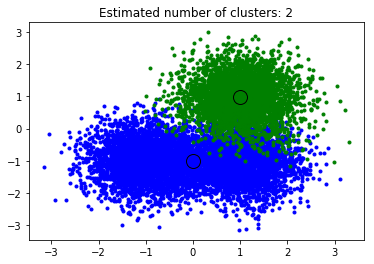

In [288]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1, 1], [-1, -1, -1], [1, -1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
print(type(X))

ms = MeanShift(bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [286]:
[[1, 2],[2, 3]]

[[1, 2], [2, 3]]